<a href="https://colab.research.google.com/github/devdongnim/GoogleColab-MLstudy/blob/main/%ED%98%BC%EA%B3%B5_MLDL_2%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#평가에 사용하는 데이터를 테스트 세트
#훈련에 사용하는 데이터를 훈련세트라고 함

In [ ]:
fish_data=[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]

In [ ]:
train_input = fish_data[:35]

In [ ]:
fish_target=[1]*35+[0]*14

#샘플링 편향 없도록 훈련세트에 샘플을 골고루 섞어야함

In [ ]:
import numpy as np

input_arr =np.array(fish_data)
target_arr =np.array(fish_target)

print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
#데이터 섞기

index= np.arange(49)  #0~48 까지 정수배열 생성
np.random.shuffle(index)   #섞기
print(index)

[21 26 25 33 14  9 30 18  1 16 35  4 34 12 44 17 41 15  6 36 31  0 42 45
  8 29  5 23 46 10 22 11 48 38 37 32 39  2 13  3 24 40 43  7 19 27 28 47
 20]


In [ ]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input =input_arr[index[35:]]
test_target = target_arr[index[35:]]

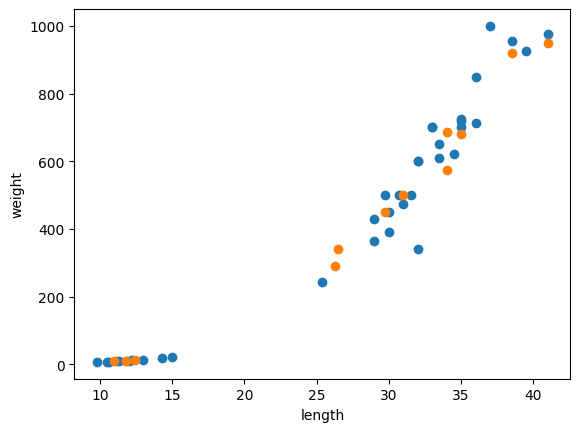

In [ ]:
# 산점도 그려보기

import matplotlib.pyplot as plt

plt.scatter(train_input[:,0],train_input[:,1])  # [:,0] => 첫번째열(특성) [:,1] => 두번째열(특성)
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# K 최근접 이웃모델로 훈련 및 평가

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [ ]:
kn = kn.fit(train_input, train_target)
kn.score(test_input,test_target)

1.0

In [ ]:
kn.predict(test_input)

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

In [ ]:
test_target

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

#2-2절 데이터 전처리

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
import numpy as np

In [ ]:
fish_data= np.column_stack((fish_length,fish_weight))  #row_stack 도 있음

In [ ]:
fish_target= np.concatenate((np.ones(35),np.zeros(14)))   #concatenate 사슬처럼 잇다
# np.ones((2,3)) 배열도 가능
# np.full((2,3),9)

#사이킷런으로 훈련 세트와 테스트 세트 나누기

In [ ]:
from sklearn.model_selection import train_test_split

train_input,test_input,train_target, test_target = train_test_split(fish_data,fish_target, stratify=fish_target, random_state=42)
# stratify 매개변수 , target 보고 골고루 섞이게 해줌
# random => seed 와 같이 일정한값 나오게 해줌

In [ ]:
print(train_input.shape, test_input.shape)
print(train_target.shape, train_input.shape) #크기확인

(36, 2) (13, 2)
(36,) (36, 2)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn= KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input,test_target)

1.0

[0.]


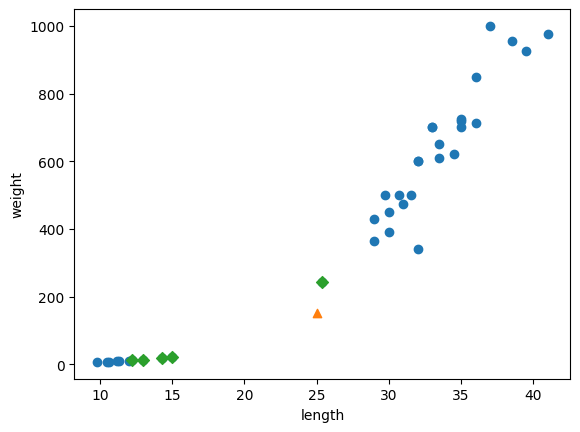

In [ ]:
#25, 150으로 predict

print(kn.predict([[25,150]]))

distances, indexes =kn.kneighbors([[25,150]])
#이웃샘플들의 인덱스 반환

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
#plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#두 특성의 scale이 달라서 거리가 가까워보여도 가까운값 아니였음

#표준점수로 바꾸기
#(특성 - (특성의)평균) / 표준편차 = 표준점수 or Z점수

In [ ]:
mean= np.mean(train_input ,axis=0) #mean 평균 구하기      #axis=1 => 가로(샘플) axis=0 세로(특성)
std =np.std(train_input, axis=0 ) #std 표준편차 구하기

print(mean, std)

train_scaled= (train_input -mean) / std  #표준점수 구하기

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


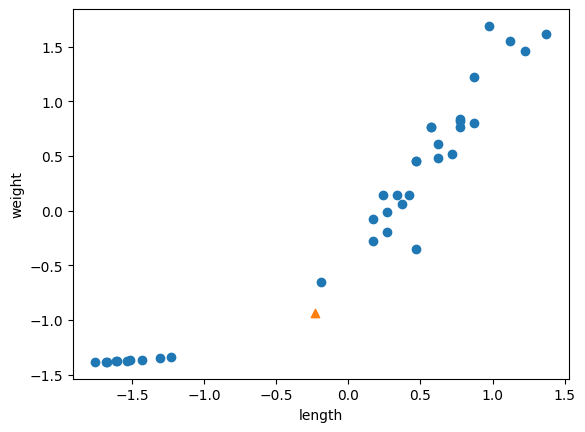

In [ ]:
#수상한 도미 표준점수로 다시 표시하기

new=([25,150] - mean) /std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1], marker='^')
#plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn.fit(train_scaled, train_target)

test_scaled =(test_input - mean) / std
#테스트 세트의 샘플도 훈련세트의 평균과 표준편차로 변한해야함

kn.score(test_scaled, test_target)

print(kn.predict([new]))

[1.]


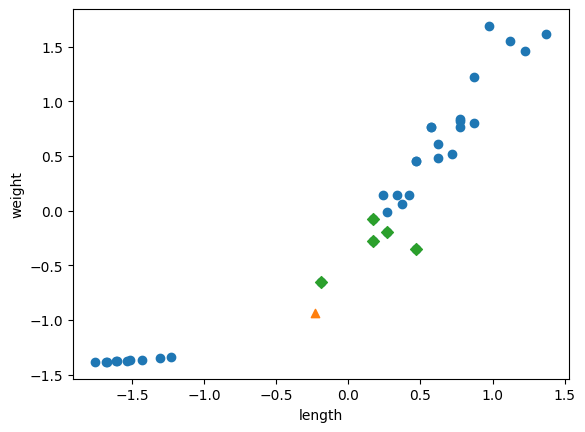

In [ ]:
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()